<a href="https://colab.research.google.com/github/SaumilShah-7/Dog-Breed-Identification-Kaggle/blob/master/Dog_Breed_Identification_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import cv2

TensorFlow 2.x selected.
2.0.0-rc2


In [2]:
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle (2).json


In [3]:
!kaggle competitions download -c dog-breed-identification

labels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
with ZipFile('train.zip', 'r') as zipobj:
  zipobj.extractall()
with ZipFile('test.zip', 'r') as zipobj:
  zipobj.extractall()
with ZipFile('labels.csv.zip', 'r') as zipobj:
  zipobj.extractall()
with ZipFile('labels.csv.zip', 'r') as zipobj:
  zipobj.extractall()
with ZipFile('sample_submission.csv.zip', 'r') as zipobj:
  zipobj.extractall()

In [0]:
y_df = pd.read_csv('labels.csv')
y = y_df['breed']

image_height = 60
image_width = 60

x = []
for i in y_df['id']:
  image = cv2.imread('/content/train/'+i+'.jpg')
  x.append(cv2.resize(image, (image_height, image_width)))
x = np.asarray(x)

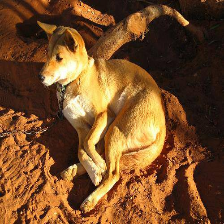

(224, 224, 3) dingo


In [6]:
from google.colab.patches import cv2_imshow

cv2_imshow(x[1])
print(x[1].shape, y[1])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8177, 224, 224, 3) (2045, 224, 224, 3) (8177,) (2045,)
